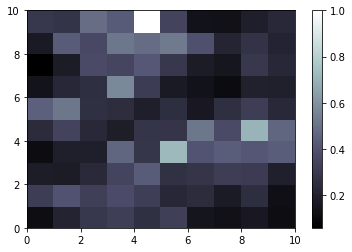

In [42]:
# importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing data
dataset = pd.read_csv('Energy consuming household price1983_2018.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
 
    
# scaling/normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

#initializing self organizing map
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=11,sigma=1.0,learning_rate=0.1)
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

#visualizing the som
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
colors = ['r','g']


#finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)],mappings[(1,2)]),axis=0)
